In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_dataset_v2 = pd.read_csv('../data/forecast_dataset_exp1.csv')

In [3]:
df_dataset_v2.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.85, 0.95, 0.99,0.9999])

,month,unit_markup,Y,hc_cluster_1,hc_cluster_2,hc_cluster_3,hc_cluster_4,hc_cluster_5,hc_cluster_6,hc_cluster_7,...,cat_code_1,cat_code_2,cat_code_3,cat_code_4,cat_code_5,cat_code_6,cat_code_7,cat_code_8,cat_code_9,cat_code_10
count,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.00000,11190.000000,11190.000000,...,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000
mean,6.231993,1.696202,13.589097,0.351921,0.533691,0.004558,0.020554,0.01412,0.009562,0.001519,...,0.002860,0.001787,0.003664,0.055764,0.009562,0.020554,0.001519,0.003307,0.010813,0.004558
std,3.594115,0.414477,34.622201,0.477591,0.498886,0.067359,0.141892,0.11799,0.097322,0.038949,...,0.053402,0.042241,0.060423,0.229476,0.097322,0.141892,0.038949,0.057410,0.103428,0.067359
min,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.000000,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.000000,1.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.700000,4.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,2.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85%,11.000000,2.100000,18.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Filtering the outliers in Y
Ill removing the last 1% of the Y values only during training

In [4]:
MAX_Y = 200 #177.110000 - 99%

In [5]:
df_dataset_v2.head()

,code,year_month,month,unit_markup,Y,hc_cluster_1,hc_cluster_2,hc_cluster_3,hc_cluster_4,hc_cluster_5,...,cat_code_1,cat_code_2,cat_code_3,cat_code_4,cat_code_5,cat_code_6,cat_code_7,cat_code_8,cat_code_9,cat_code_10
0,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.1,53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.2,92,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.3,28,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.4,61,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0671c2b9132a3f5215a4212ce0691694,2016-11,11,1.5,21,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_cols = [c for c in df_dataset_v2.columns if c not in ['year_month', 'Y']]

In [7]:
df_dataset_v2['code'] = df_dataset_v2['code'].astype('category').cat.codes

In [8]:
df_dataset_v2[X_cols].head()

,code,month,unit_markup,hc_cluster_1,hc_cluster_2,hc_cluster_3,hc_cluster_4,hc_cluster_5,hc_cluster_6,hc_cluster_7,...,cat_code_1,cat_code_2,cat_code_3,cat_code_4,cat_code_5,cat_code_6,cat_code_7,cat_code_8,cat_code_9,cat_code_10
0,0,11,1.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,11,1.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,11,1.3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,11,1.4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,11,1.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Sets
* We will use the temporal series cross validation
* 3 months minimum intervals
* 3 training, 6 validation, 3 test
* 4 training, 5 validation, 3 test
* 5 training, 4 validation, 3 test
* 6 training, 3 validation, 3 test

In [9]:
df_train_val_test = pd.read_csv('../data/train_val_test.csv')

In [10]:
df_train_val_test

,set,train,val,reserved
0,0,"['2016-06', '2016-07', '2016-08']","['2016-09', '2016-10', '2016-11', '2016-12', '...",False
1,1,"['2016-06', '2016-07', '2016-08', '2016-09']","['2016-10', '2016-11', '2016-12', '2017-01', '...",False
2,2,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2016-11', '2016-12', '2017-01', '2017-02']",False
3,3,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2016-12', '2017-01', '2017-02']",False
4,4,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2017-01', '2017-02']",False
5,5,"['2016-06', '2016-07', '2016-08', '2016-09', '...",['2017-02'],False
6,6,"['2016-06', '2016-07', '2016-08', '2016-09', '...","['2017-03', '2017-04', '2017-05']",True


## Regressors Init

In [11]:
regressors = {}
RANDOM_STATE = 42

In [12]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(random_state=RANDOM_STATE)
regressors['gbm'] = gbm

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=RANDOM_STATE)
regressors['rf'] = rf

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=RANDOM_STATE)
regressors['dt'] = dt

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Train Eval



In [16]:
def parse_str_list(str_list):
    result = str_list.replace("'","").replace('[','').replace(']','').replace(' ', '').split(',')
    return result

In [17]:
sets = list(df_train_val_test[~df_train_val_test.reserved].set.values)
sets

[0, 1, 2, 3, 4, 5]

In [18]:
results = []
for r_name, r in regressors.items():
    for s in sets:
        df_set = df_train_val_test[~df_train_val_test.reserved & (df_train_val_test.set == s)]

        x_scaler = StandardScaler()
        
        train_years = parse_str_list(df_set.train.values[0])
        val_years = parse_str_list(df_set.val.values[0])
        print(f'Training {r_name} on set {s}')
        

        df_train = df_dataset_v2[df_dataset_v2.year_month.isin(train_years) & (df_dataset_v2.Y < MAX_Y)]
        df_val = df_dataset_v2[df_dataset_v2.year_month.isin(val_years)]

    
        y_train = df_train['Y'].values    
        
        r_inst = r.fit(X=x_scaler.fit_transform(df_train[X_cols]), y=y_train)
        
        print(f'Validating {r_name}  on set {s}')
        y_val = df_val['Y']
        y_pred_val = r_inst.predict(x_scaler.transform(df_val[X_cols]))
        
        y_pred_val = y_pred_val
        m = _metrics.applyRegressionMetrics(y=y_val, y_pred=y_pred_val)
        m['reg_inst'] = r_inst
        m['r_name'] = r_name
        m['set'] = s
        results.append(m)
#         print(len(y_train), len(y_val))

    print()
df_results = pd.DataFrame(results)    

Training gbm on set 0
Validating gbm  on set 0
Training gbm on set 1
Validating gbm  on set 1
Training gbm on set 2
Validating gbm  on set 2
Training gbm on set 3
Validating gbm  on set 3
Training gbm on set 4
Validating gbm  on set 4
Training gbm on set 5
Validating gbm  on set 5

Training rf on set 0
Validating rf  on set 0
Training rf on set 1
Validating rf  on set 1
Training rf on set 2
Validating rf  on set 2
Training rf on set 3
Validating rf  on set 3
Training rf on set 4
Validating rf  on set 4
Training rf on set 5
Validating rf  on set 5

Training dt on set 0
Validating dt  on set 0
Training dt on set 1
Validating dt  on set 1
Training dt on set 2
Validating dt  on set 2
Training dt on set 3
Validating dt  on set 3
Training dt on set 4
Validating dt  on set 4
Training dt on set 5
Validating dt  on set 5



In [19]:
metric_list = []

In [20]:
df_results.groupby('r_name').agg({'RMSE':[pd.Series.mean, pd.Series.std],'MAPE':[pd.Series.mean, pd.Series.std],'MSE':[pd.Series.mean, pd.Series.std],'MAE':[pd.Series.mean, pd.Series.std],'R2':[pd.Series.mean, pd.Series.std],})

RMSE                MAPE                   MSE              \
             mean       std      mean       std        mean         std   
r_name                                                                    
dt      29.265837  1.291459  1.642574  0.373677  857.879121   74.581701   
gbm     27.704913  2.679077  2.188405  0.488907  773.543404  138.824986   
rf      27.581800  1.679249  1.837937  0.468971  763.105594   89.173667   

              MAE                  R2            
             mean       std      mean       std  
r_name                                           
dt      11.298565  0.415931  0.204097  0.123391  
gbm     11.112554  0.652515  0.298097  0.016605  
rf      10.687959  0.227794  0.298246  0.066980

Training gbm on set 6
Validating gbm  on set 6
7559 3312
RMSE : 30.3994
MAPE': 1.6075
MDAPE': 0.6667
MSE: 924.1238
MAE: 10.0054
R2: 0.2715


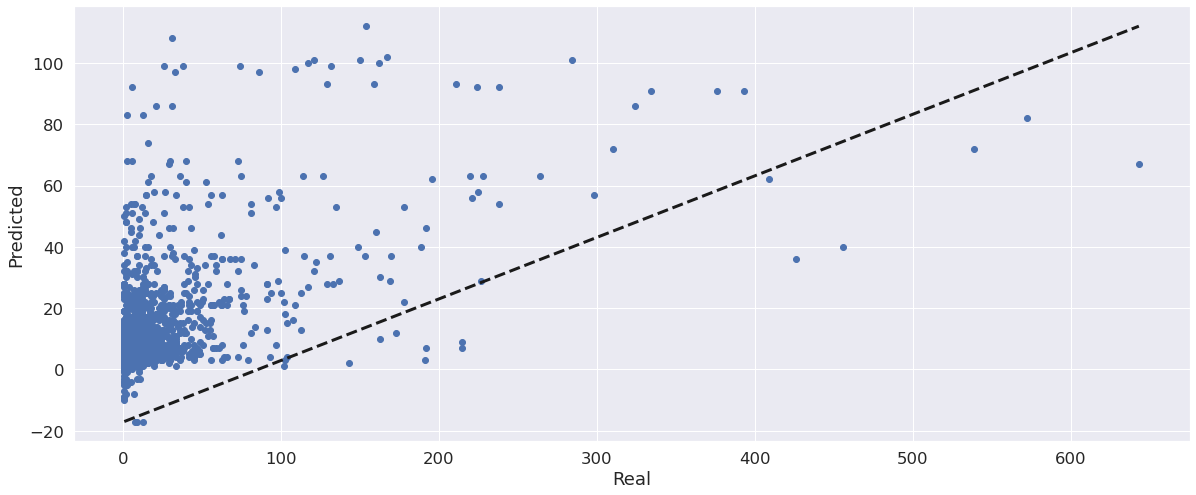

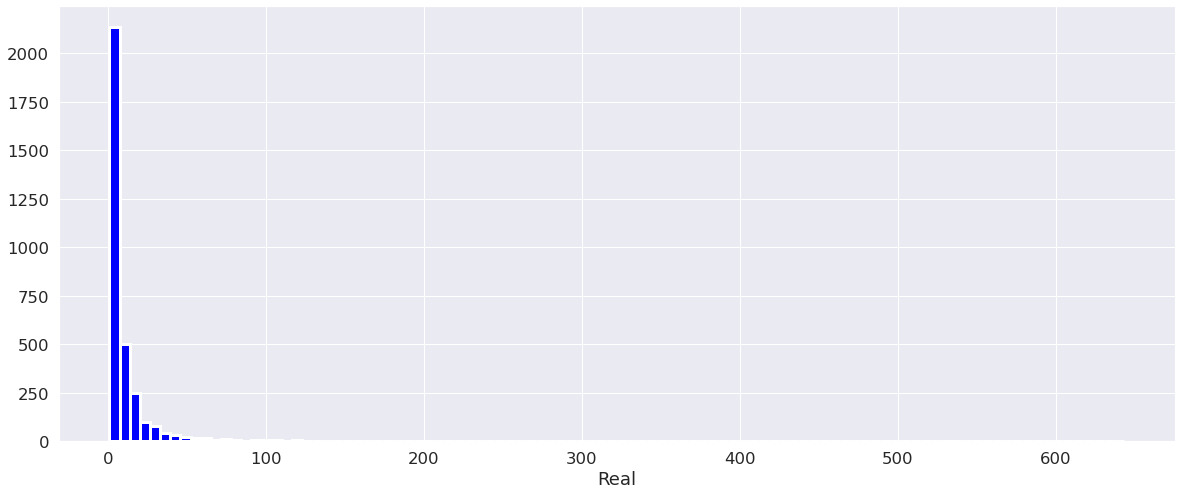

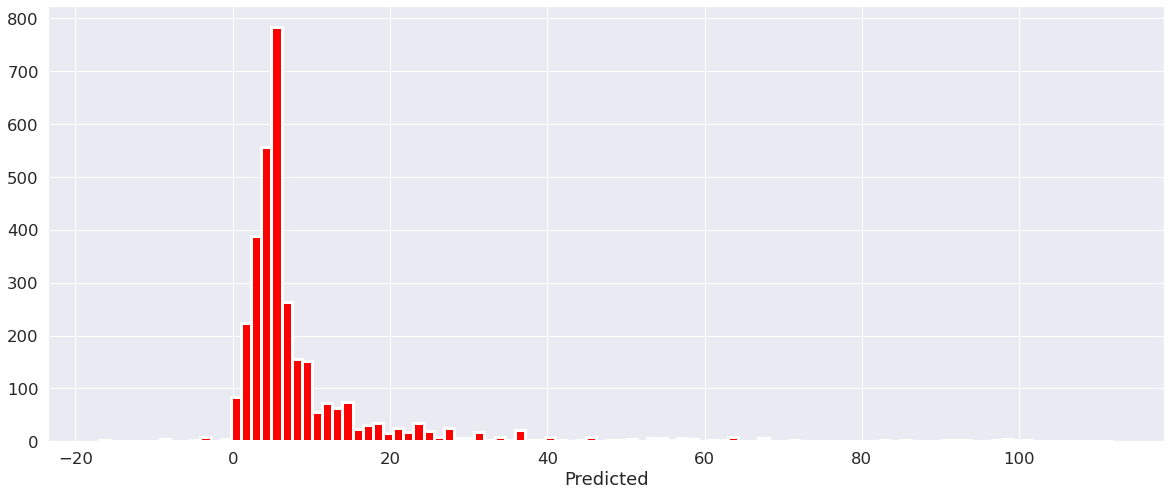


Training rf on set 6
Validating rf  on set 6
7559 3312
RMSE : 30.2027
MAPE': 1.4299
MDAPE': 0.6364
MSE: 912.2026
MAE: 10.1030
R2: 0.2809


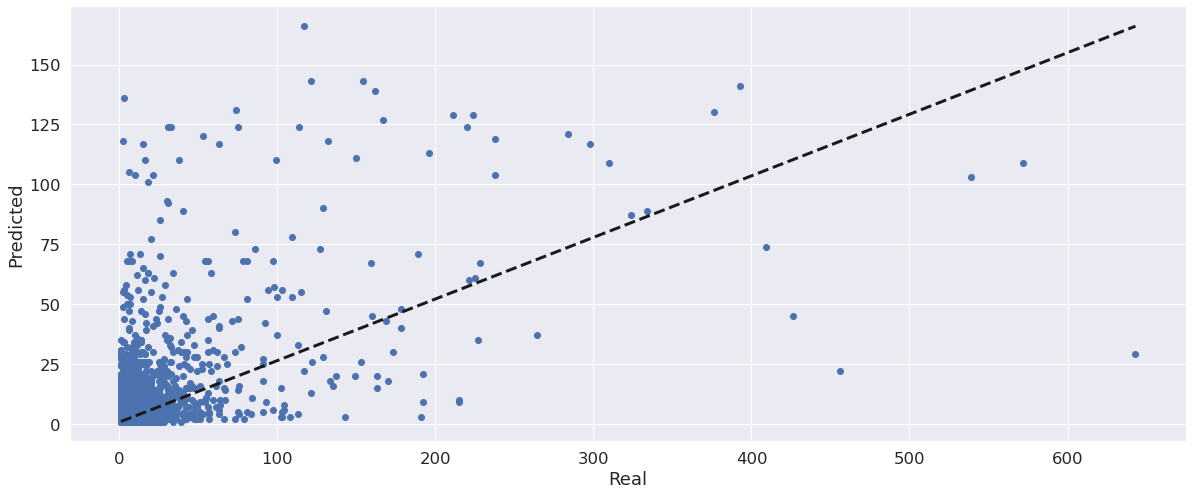

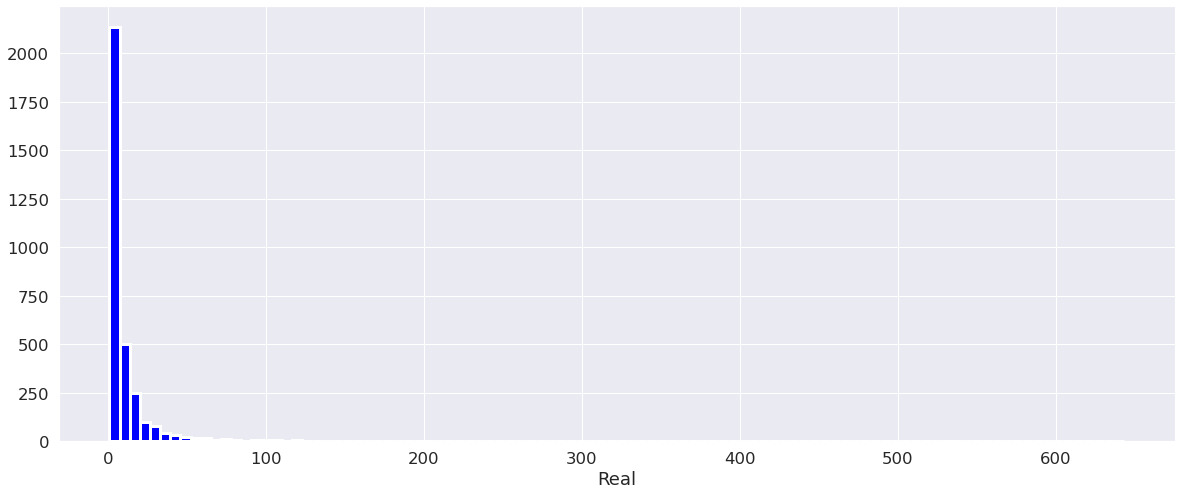

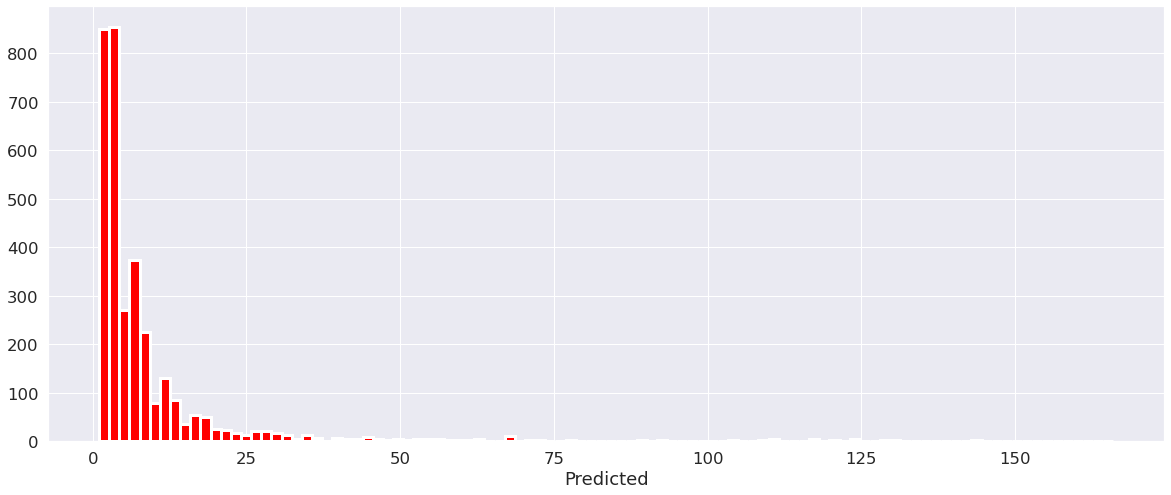


Training dt on set 6
Validating dt  on set 6
7559 3312
RMSE : 31.2771
MAPE': 1.4161
MDAPE': 0.6667
MSE: 978.2597
MAE: 10.8690
R2: 0.2288


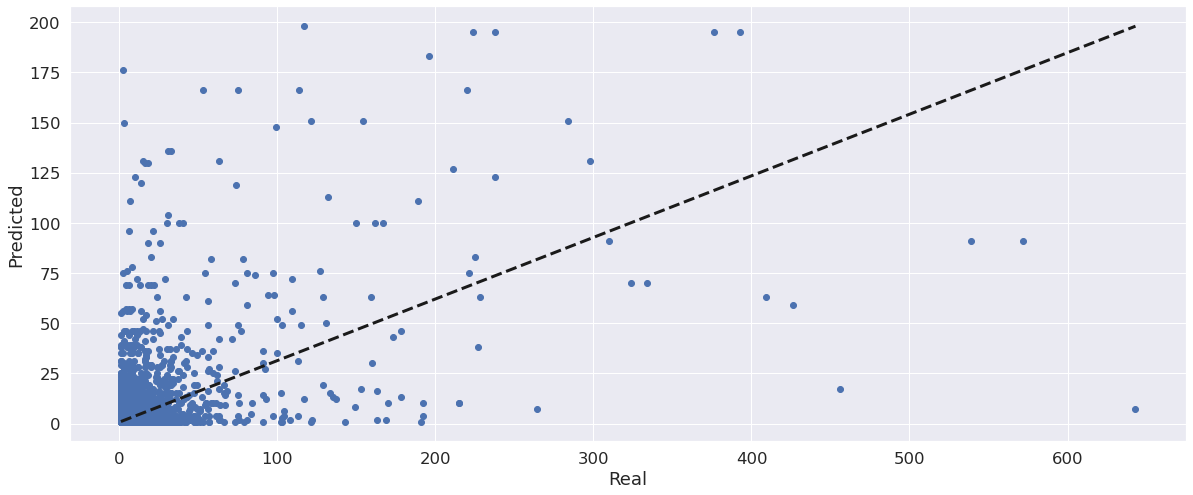

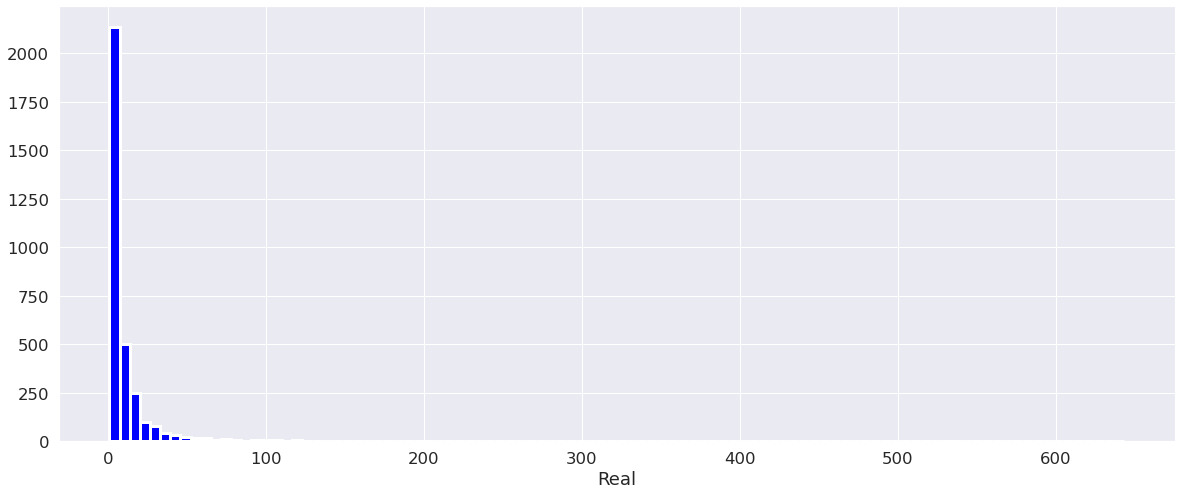

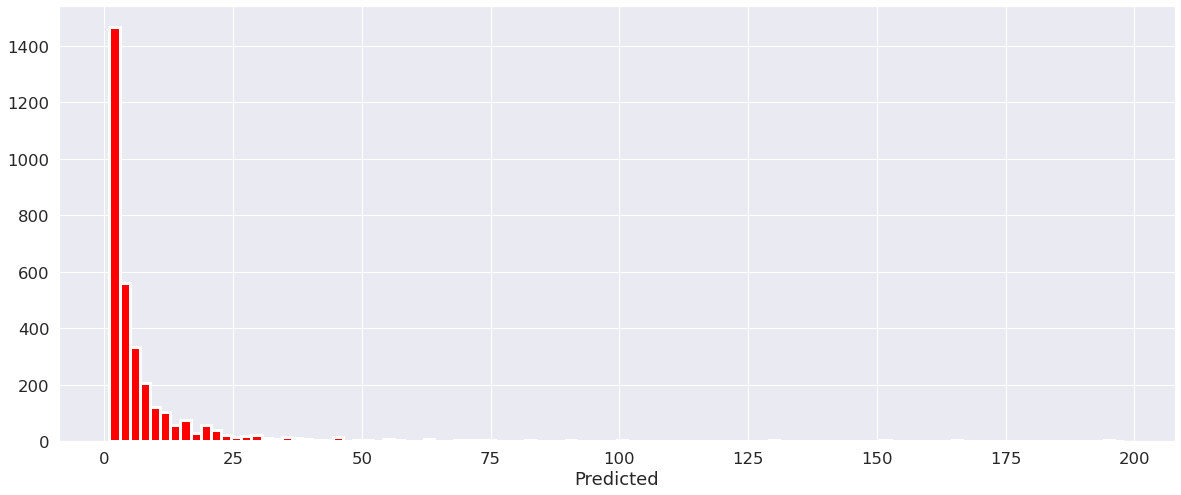

In [21]:
results = []
for r_name, r in regressors.items():
    s=6
    x_scaler = StandardScaler()

    df_set = df_train_val_test[(df_train_val_test.set == s)]

    x_scaler = StandardScaler()

    train_years = parse_str_list(df_set.train.values[0])
    val_years = parse_str_list(df_set.val.values[0])
    print(f'Training {r_name} on set {s}')

    df_train = df_dataset_v2[df_dataset_v2.year_month.isin(train_years) & (df_dataset_v2.Y < MAX_Y)]
    df_val = df_dataset_v2[df_dataset_v2.year_month.isin(val_years)]

    y_train = df_train['Y'].values    

    r_inst = r.fit(X=x_scaler.fit_transform(df_train[X_cols]), y=y_train.flatten())

    print(f'Validating {r_name}  on set {s}')
    y_val = df_val['Y']
    y_pred_val = r_inst.predict(x_scaler.transform(df_val[X_cols]))

    y_pred_val = y_pred_val
    m = _metrics.applyRegressionMetrics(y=y_val, y_pred=y_pred_val)
    m['reg_inst'] = r_inst
    m['r_name'] = r_name
    m['set'] = s
    results.append(m)
    print(len(y_train), len(y_val))
    _metrics.evaluateRegression(y=y_val, y_pred=y_pred_val)
    print()
df_results = pd.DataFrame(results)    

In [22]:
df_results

,y,y_pred,RMSE,MAPE,MDAPE,MSE,MAE,R2,reg_inst,r_name,set
0,51 238 52 298 53 220 54 ...,"[54.0, 57.0, 63.0, 54.0, 37.0, 37.0, 28.0, 28....",30.399404,1.607487,0.666667,924.123792,10.005435,0.271465,LGBMRegressor(random_state=42),gbm,6
1,51 238 52 298 53 220 54 ...,"[104.0, 117.0, 124.0, 68.0, 44.0, 14.0, 18.0, ...",30.202692,1.429944,0.636364,912.202597,10.102959,0.280863,"(DecisionTreeRegressor(max_features='auto', ra...",rf,6
2,51 238 52 298 53 220 54 ...,"[123.0, 131.0, 166.0, 75.0, 49.0, 7.0, 14.0, 1...",31.277143,1.416149,0.666667,978.259662,10.868961,0.228787,DecisionTreeRegressor(random_state=42),dt,6
